In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',250)
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom.shape

(99999, 226)

In [5]:
col_with_single_value=[]
col_with_2_value=[]
for col in telecom.columns:
    uniq_num = telecom[col].nunique()
    no_of_null = telecom[col].isna().sum()
    per_null = round((telecom[col].isna().sum()/telecom.shape[0])*100,2)
    print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)
    if uniq_num ==1:
        col_with_single_value.append(col)
    elif uniq_num == 2:
        col_with_2_value.append(col)

Column:  mobile_number , No of unique values:  99999 , no of null: 0  ,percentage null: 0.0
Column:  circle_id , No of unique values:  1 , no of null: 0  ,percentage null: 0.0
Column:  loc_og_t2o_mou , No of unique values:  1 , no of null: 1018  ,percentage null: 1.02
Column:  std_og_t2o_mou , No of unique values:  1 , no of null: 1018  ,percentage null: 1.02
Column:  loc_ic_t2o_mou , No of unique values:  1 , no of null: 1018  ,percentage null: 1.02
Column:  last_date_of_month_6 , No of unique values:  1 , no of null: 0  ,percentage null: 0.0
Column:  last_date_of_month_7 , No of unique values:  1 , no of null: 601  ,percentage null: 0.6
Column:  last_date_of_month_8 , No of unique values:  1 , no of null: 1100  ,percentage null: 1.1
Column:  last_date_of_month_9 , No of unique values:  1 , no of null: 1659  ,percentage null: 1.66
Column:  arpu_6 , No of unique values:  85681 , no of null: 0  ,percentage null: 0.0
Column:  arpu_7 , No of unique values:  85308 , no of null: 0  ,percent

Column:  loc_ic_t2t_mou_9 , No of unique values:  12993 , no of null: 7745  ,percentage null: 7.75
Column:  loc_ic_t2m_mou_6 , No of unique values:  22065 , no of null: 3937  ,percentage null: 3.94
Column:  loc_ic_t2m_mou_7 , No of unique values:  21918 , no of null: 3859  ,percentage null: 3.86
Column:  loc_ic_t2m_mou_8 , No of unique values:  21886 , no of null: 5378  ,percentage null: 5.38
Column:  loc_ic_t2m_mou_9 , No of unique values:  21484 , no of null: 7745  ,percentage null: 7.75
Column:  loc_ic_t2f_mou_6 , No of unique values:  7250 , no of null: 3937  ,percentage null: 3.94
Column:  loc_ic_t2f_mou_7 , No of unique values:  7395 , no of null: 3859  ,percentage null: 3.86
Column:  loc_ic_t2f_mou_8 , No of unique values:  7097 , no of null: 5378  ,percentage null: 5.38
Column:  loc_ic_t2f_mou_9 , No of unique values:  7091 , no of null: 7745  ,percentage null: 7.75
Column:  loc_ic_mou_6 , No of unique values:  28569 , no of null: 3937  ,percentage null: 3.94
Column:  loc_ic_mo

Column:  arpu_3g_9 , No of unique values:  8063 , no of null: 74077  ,percentage null: 74.08
Column:  arpu_2g_6 , No of unique values:  6990 , no of null: 74846  ,percentage null: 74.85
Column:  arpu_2g_7 , No of unique values:  6586 , no of null: 74428  ,percentage null: 74.43
Column:  arpu_2g_8 , No of unique values:  6652 , no of null: 73660  ,percentage null: 73.66
Column:  arpu_2g_9 , No of unique values:  6795 , no of null: 74077  ,percentage null: 74.08
Column:  night_pck_user_6 , No of unique values:  2 , no of null: 74846  ,percentage null: 74.85
Column:  night_pck_user_7 , No of unique values:  2 , no of null: 74428  ,percentage null: 74.43
Column:  night_pck_user_8 , No of unique values:  2 , no of null: 73660  ,percentage null: 73.66
Column:  night_pck_user_9 , No of unique values:  2 , no of null: 74077  ,percentage null: 74.08
Column:  monthly_2g_6 , No of unique values:  5 , no of null: 0  ,percentage null: 0.0
Column:  monthly_2g_7 , No of unique values:  6 , no of null

In [6]:
telecom['vbc_3g_6']=telecom['jun_vbc_3g']
telecom['vbc_3g_7']=telecom['jul_vbc_3g']
telecom['vbc_3g_8']=telecom['aug_vbc_3g']
telecom['vbc_3g_9']=telecom['sep_vbc_3g']

In [7]:
print('Column with single value : ',col_with_single_value)
##Dropping values with single columns
telecom=telecom.drop(columns=col_with_single_value)

Column with single value :  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [8]:
## Imputing categorical value with 0
for col in col_with_2_value:
    telecom[col].fillna(value=0,inplace=True)

In [9]:
for col in telecom.columns:
    if col.find('rech') >0:
        print(col)

total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_num_9
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9
total_rech_data_6
total_rech_data_7
total_rech_data_8
total_rech_data_9
max_rech_data_6
max_rech_data_7
max_rech_data_8
max_rech_data_9
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_2g_9
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
count_rech_3g_9
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9


In [10]:
## Columns with null values
col_with_null = telecom.columns[telecom.isna().any()].tolist()
print(col_with_null)
print(telecom.shape)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'is

In [11]:
#Identifying the columns with recharge information
telecom_recharge_cols = [col for col in telecom.columns if 'rech_' in col]
print(telecom_recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [12]:
#Columns required for calculating the net recharge amount for months 6 & 7

recharge_cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
                 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']


In [13]:
telecom[recharge_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
total_rech_amt_6      99999 non-null int64
total_rech_amt_7      99999 non-null int64
total_rech_amt_8      99999 non-null int64
total_rech_amt_9      99999 non-null int64
total_rech_data_6     25153 non-null float64
total_rech_data_7     25571 non-null float64
total_rech_data_8     26339 non-null float64
total_rech_data_9     25922 non-null float64
av_rech_amt_data_6    25153 non-null float64
av_rech_amt_data_7    25571 non-null float64
av_rech_amt_data_8    26339 non-null float64
av_rech_amt_data_9    25922 non-null float64
dtypes: float64(8), int64(4)
memory usage: 9.2 MB


In [14]:
#Calculating the net recharge amount for all the 4 months

telecom['total_recharge_data_amt_6'] = telecom['total_rech_data_6'].fillna(0) * telecom['av_rech_amt_data_6'].fillna(0)

telecom['total_recharge_data_amt_7'] = telecom['total_rech_data_7'].fillna(0) * telecom['av_rech_amt_data_7'].fillna(0)

telecom['total_recharge_data_amt_8'] = telecom['total_rech_data_8'].fillna(0) * telecom['av_rech_amt_data_8'].fillna(0)

telecom['total_recharge_data_amt_9'] = telecom['total_rech_data_9'].fillna(0) * telecom['av_rech_amt_data_9'].fillna(0)



telecom['net_recharge_amt_6'] = telecom['total_rech_amt_6'] + telecom['total_recharge_data_amt_6']

telecom['net_recharge_amt_7'] = telecom['total_rech_amt_7'] + telecom['total_recharge_data_amt_7']

telecom['net_recharge_amt_8'] = telecom['total_rech_amt_8'] + telecom['total_recharge_data_amt_8']

telecom['net_recharge_amt_9'] = telecom['total_rech_amt_9'] + telecom['total_recharge_data_amt_9']


In [15]:
#Calculating the average recharge amounts for the 2 months
telecom['avg_rech_amt_6_7'] = (telecom['net_recharge_amt_6']  + telecom['net_recharge_amt_7'])/2

In [16]:
##Calculating the 70th percentile of the average recharge amount in the first 2 months
telecom["avg_rech_amt_6_7"].describe(percentiles=[.25,.5,.70,.90,.95,.99])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
90%       1028.000000
95%       1512.000000
99%       3363.510000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [17]:
#Filtering the high-value customers based on whether they recharge for an amount greater than or equal to 478
telecom_hv_df = telecom[telecom['avg_rech_amt_6_7'] >= 478.0]

In [18]:
telecom_hv_df.shape

(30001, 223)

In [19]:
#Dropping the redundant recharge columns
recharge_cols_drop = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                      'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','avg_rech_amt_6_7']

telecom_hv_df.drop(recharge_cols_drop, axis=1, inplace=True)

In [20]:
telecom_hv_df.shape

(30001, 214)

In [21]:
pd.set_option('display.max_columns',250)
telecom_hv_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9,total_recharge_data_amt_6,total_recharge_data_amt_7,total_recharge_data_amt_8,total_recharge_data_amt_9,net_recharge_amt_6,net_recharge_amt_7,net_recharge_amt_8,net_recharge_amt_9
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,0.0,0,0,0,0,

In [22]:
col_gt_50_na=[]
for col in telecom_hv_df.columns:
    uniq_num = telecom_hv_df[col].nunique()
    no_of_null = telecom_hv_df[col].isna().sum()
    per_null = round((telecom_hv_df[col].isna().sum()/telecom_hv_df.shape[0])*100,2)
    if per_null > 0:
        col_gt_50_na.append(col)
        print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)
print(len(col_gt_50_na))

Column:  onnet_mou_6 , No of unique values:  16890 , no of null: 545  ,percentage null: 1.82
Column:  onnet_mou_7 , No of unique values:  16987 , no of null: 537  ,percentage null: 1.79
Column:  onnet_mou_8 , No of unique values:  15872 , no of null: 1174  ,percentage null: 3.91
Column:  onnet_mou_9 , No of unique values:  15075 , no of null: 1901  ,percentage null: 6.34
Column:  offnet_mou_6 , No of unique values:  21220 , no of null: 545  ,percentage null: 1.82
Column:  offnet_mou_7 , No of unique values:  21263 , no of null: 537  ,percentage null: 1.79
Column:  offnet_mou_8 , No of unique values:  20163 , no of null: 1174  ,percentage null: 3.91
Column:  offnet_mou_9 , No of unique values:  19150 , no of null: 1901  ,percentage null: 6.34
Column:  roam_ic_mou_6 , No of unique values:  4048 , no of null: 545  ,percentage null: 1.82
Column:  roam_ic_mou_7 , No of unique values:  3385 , no of null: 537  ,percentage null: 1.79
Column:  roam_ic_mou_8 , No of unique values:  3433 , no of 

Column:  date_of_last_rech_data_6 , No of unique values:  30 , no of null: 13245  ,percentage null: 44.15
Column:  date_of_last_rech_data_7 , No of unique values:  31 , no of null: 12944  ,percentage null: 43.15
Column:  date_of_last_rech_data_8 , No of unique values:  31 , no of null: 14048  ,percentage null: 46.83
Column:  date_of_last_rech_data_9 , No of unique values:  30 , no of null: 14781  ,percentage null: 49.27
Column:  max_rech_data_6 , No of unique values:  47 , no of null: 13245  ,percentage null: 44.15
Column:  max_rech_data_7 , No of unique values:  48 , no of null: 12944  ,percentage null: 43.15
Column:  max_rech_data_8 , No of unique values:  48 , no of null: 14048  ,percentage null: 46.83
Column:  max_rech_data_9 , No of unique values:  48 , no of null: 14781  ,percentage null: 49.27
Column:  count_rech_2g_6 , No of unique values:  31 , no of null: 13245  ,percentage null: 44.15
Column:  count_rech_2g_7 , No of unique values:  36 , no of null: 12944  ,percentage null: 

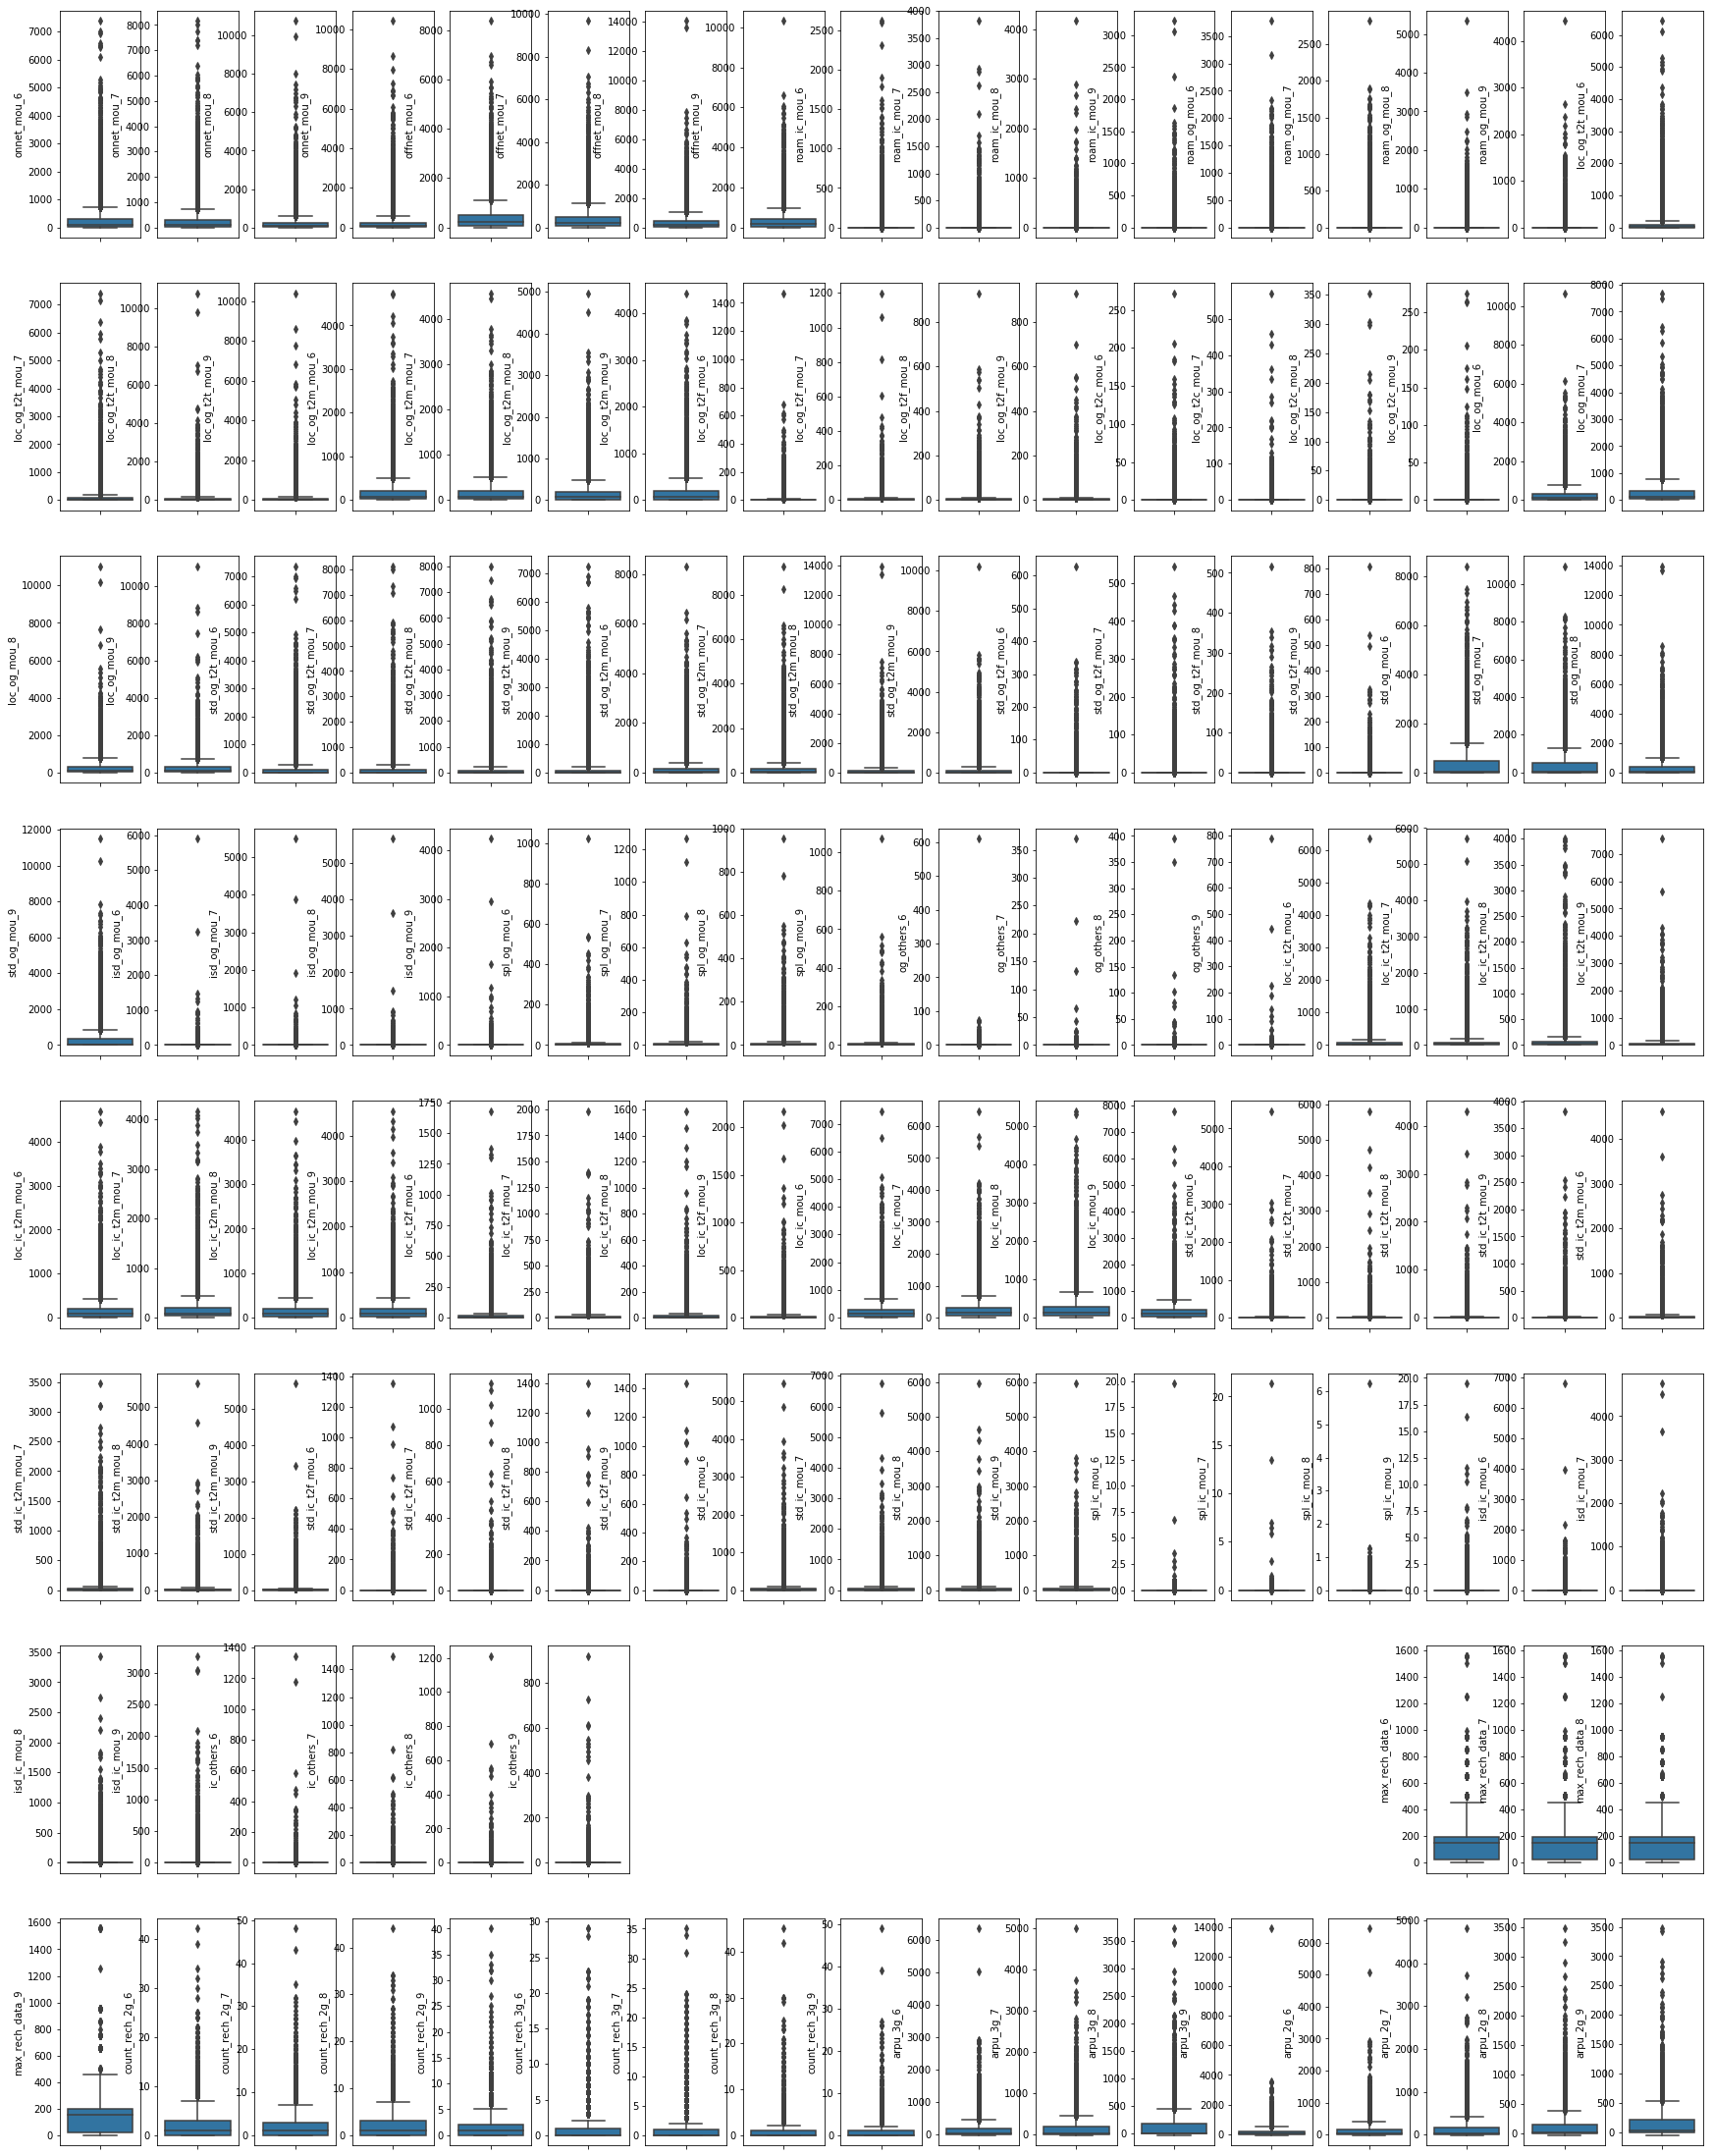

In [23]:
from pylab import *
dates=telecom_hv_df.select_dtypes(include=['object']).columns
plt.figure(figsize=(30,40))
for i, col in enumerate(col_gt_50_na):
    if(col not in dates):
        subplot(8,17,i+1)
        sns.boxplot(telecom_hv_df[col].astype(np.float).dropna(),orient='v')

In [24]:
dates=telecom_hv_df.select_dtypes(include=['object']).columns
for col in dates:
    uniq_num = telecom_hv_df[col].nunique()
    no_of_null = telecom_hv_df[col].isna().sum()
    per_null = round((telecom_hv_df[col].isna().sum()/telecom_hv_df.shape[0])*100,2)
    print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)

Column:  date_of_last_rech_6 , No of unique values:  30 , no of null: 73  ,percentage null: 0.24
Column:  date_of_last_rech_7 , No of unique values:  31 , no of null: 98  ,percentage null: 0.33
Column:  date_of_last_rech_8 , No of unique values:  31 , no of null: 583  ,percentage null: 1.94
Column:  date_of_last_rech_9 , No of unique values:  30 , no of null: 815  ,percentage null: 2.72
Column:  date_of_last_rech_data_6 , No of unique values:  30 , no of null: 13245  ,percentage null: 44.15
Column:  date_of_last_rech_data_7 , No of unique values:  31 , no of null: 12944  ,percentage null: 43.15
Column:  date_of_last_rech_data_8 , No of unique values:  31 , no of null: 14048  ,percentage null: 46.83
Column:  date_of_last_rech_data_9 , No of unique values:  30 , no of null: 14781  ,percentage null: 49.27


In [25]:
## Dropping columns with more than 40% null value
telecom_hv_df.drop(columns=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],inplace=True)

In [26]:
#Dropping date with null value
dates=telecom_hv_df.select_dtypes(include=['object']).columns
for col in dates:
    print(telecom_hv_df[col].value_counts())

6/30/2014    8376
6/29/2014    5333
6/28/2014    3666
6/27/2014    3160
6/26/2014    1827
6/25/2014    1324
6/24/2014    1042
6/23/2014     703
6/21/2014     639
6/14/2014     549
6/22/2014     526
6/17/2014     456
6/20/2014     398
6/18/2014     388
6/19/2014     387
6/12/2014     213
6/13/2014     210
6/16/2014     203
6/15/2014     141
6/11/2014      81
6/8/2014       61
6/10/2014      47
6/7/2014       47
6/5/2014       33
6/9/2014       27
6/3/2014       25
6/6/2014       24
6/4/2014       19
6/2/2014       13
6/1/2014       10
Name: date_of_last_rech_6, dtype: int64
7/31/2014    7610
7/30/2014    5287
7/29/2014    3476
7/28/2014    2793
7/25/2014    1926
7/27/2014    1789
7/26/2014    1601
7/24/2014     927
7/22/2014     653
7/15/2014     587
7/23/2014     563
7/16/2014     457
7/20/2014     421
7/21/2014     391
7/19/2014     367
7/17/2014     291
7/18/2014     252
7/10/2014      73
7/14/2014      71
7/9/2014       71
7/12/2014      59
7/13/2014      56
7/11/2014      51
7/7/20

In [27]:
telecom_hv_df['date_of_last_rech_6']=telecom_hv_df['date_of_last_rech_6'].fillna('6/30/2014')
telecom_hv_df['date_of_last_rech_7']=telecom_hv_df['date_of_last_rech_7'].fillna('7/31/2014')
telecom_hv_df['date_of_last_rech_8']=telecom_hv_df['date_of_last_rech_8'].fillna('8/31/2014')
telecom_hv_df['date_of_last_rech_9']=telecom_hv_df['date_of_last_rech_9'].fillna('9/29/2014')

In [28]:
print(telecom_hv_df.select_dtypes(include=['object']).columns)
dates=telecom_hv_df.select_dtypes(include=['object']).columns
for col_date in dates:
    telecom_hv_df[col_date] = pd.to_datetime(telecom_hv_df[col_date])

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')


In [29]:
telecom_hv_df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'vbc_3g_8', 'vbc_3g_9', 'total_recharge_data_amt_6',
       'total_recharge_data_amt_7', 'total_recharge_data_amt_8',
       'total_recharge_data_amt_9', 'net_recharge_amt_6', 'net_recharge_amt_7',
       'net_recharge_amt_8', 'net_recharge_amt_9'],
      dtype='object', length=210)

In [30]:
for col in telecom_hv_df.columns:
    uniq_num = telecom_hv_df[col].nunique()
    no_of_null = telecom_hv_df[col].isna().sum()
    per_null = round((telecom_hv_df[col].isna().sum()/telecom.shape[0])*100,2)
    if per_null>0:
        print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)
        telecom_hv_df[col]=telecom_hv_df[col].fillna(value=0)

Column:  onnet_mou_6 , No of unique values:  16890 , no of null: 545  ,percentage null: 0.55
Column:  onnet_mou_7 , No of unique values:  16987 , no of null: 537  ,percentage null: 0.54
Column:  onnet_mou_8 , No of unique values:  15872 , no of null: 1174  ,percentage null: 1.17
Column:  onnet_mou_9 , No of unique values:  15075 , no of null: 1901  ,percentage null: 1.9
Column:  offnet_mou_6 , No of unique values:  21220 , no of null: 545  ,percentage null: 0.55
Column:  offnet_mou_7 , No of unique values:  21263 , no of null: 537  ,percentage null: 0.54
Column:  offnet_mou_8 , No of unique values:  20163 , no of null: 1174  ,percentage null: 1.17
Column:  offnet_mou_9 , No of unique values:  19150 , no of null: 1901  ,percentage null: 1.9
Column:  roam_ic_mou_6 , No of unique values:  4048 , no of null: 545  ,percentage null: 0.55
Column:  roam_ic_mou_7 , No of unique values:  3385 , no of null: 537  ,percentage null: 0.54
Column:  roam_ic_mou_8 , No of unique values:  3433 , no of nu

Column:  std_ic_t2f_mou_7 , No of unique values:  2019 , no of null: 537  ,percentage null: 0.54
Column:  std_ic_t2f_mou_8 , No of unique values:  1891 , no of null: 1174  ,percentage null: 1.17
Column:  std_ic_t2f_mou_9 , No of unique values:  1915 , no of null: 1901  ,percentage null: 1.9
Column:  std_ic_mou_6 , No of unique values:  8022 , no of null: 545  ,percentage null: 0.55
Column:  std_ic_mou_7 , No of unique values:  8139 , no of null: 537  ,percentage null: 0.54
Column:  std_ic_mou_8 , No of unique values:  7690 , no of null: 1174  ,percentage null: 1.17
Column:  std_ic_mou_9 , No of unique values:  7387 , no of null: 1901  ,percentage null: 1.9
Column:  spl_ic_mou_6 , No of unique values:  78 , no of null: 545  ,percentage null: 0.55
Column:  spl_ic_mou_7 , No of unique values:  92 , no of null: 537  ,percentage null: 0.54
Column:  spl_ic_mou_8 , No of unique values:  80 , no of null: 1174  ,percentage null: 1.17
Column:  spl_ic_mou_9 , No of unique values:  279 , no of nul

In [31]:
print(list(telecom_hv_df.select_dtypes(include=['object']).columns))

[]


In [32]:
telecom_hv_df.shape

(30001, 210)

In [33]:
telecom_hv_df['days_last_rech_6']=telecom_hv_df.date_of_last_rech_6.dt.day
telecom_hv_df['days_last_rech_7']=telecom_hv_df.date_of_last_rech_7.dt.day
telecom_hv_df['days_last_rech_8']=telecom_hv_df.date_of_last_rech_8.dt.day
telecom_hv_df['days_last_rech_9']=telecom_hv_df.date_of_last_rech_9.dt.day

In [34]:
telecom_hv_df=telecom_hv_df.drop(columns=dates)

In [35]:
telecom_hv_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9,total_recharge_data_amt_6,total_recharge_data_amt_7,total_recharge_data_amt_8,total_recharge_data_amt_9,net_recharge_amt_6,net_recharge_amt_7,net_recharge_amt_8,net_recharge_amt_9,days_last_rech_6,days_last_rech_7,days_last_rech_8,days_last_rech_9
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,101.20,0.00,30.40,3.58,252.0,252.0,252.0,0.0,614.0

In [36]:
# Tagging the churned customers based on the 4th month
telecom_hv_df['churn'] = np.where(telecom_hv_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [37]:
telecom_hv_cust=telecom_hv_df

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Calculating the total churn %
ChurnPct = round(100*(telecom_hv_cust["churn"].sum()/len(telecom_hv_cust.index)), 2)
print("% of high-value churn customers: ",ChurnPct)

% of high-value churn customers:  8.14


In [40]:
##Drop columns with _9
month_9_col=[]
for col in telecom_hv_cust.columns:
    if col.endswith('_9'):
        month_9_col.append(col)

In [41]:
month_9_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_recharge_data_amt_9',
 'net_recharge_amt_9',
 'days_last_rech_9']

In [42]:
telecom_hv_cust.drop(columns=month_9_col,inplace=True)

In [43]:
col_with_null = telecom_hv_cust.columns[telecom_hv_cust.isna().any()].tolist()
print(col_with_null)
for col in telecom_hv_cust.columns:
    print(col,telecom_hv_cust[col].dtype)

[]
mobile_number int64
arpu_6 float64
arpu_7 float64
arpu_8 float64
onnet_mou_6 float64
onnet_mou_7 float64
onnet_mou_8 float64
offnet_mou_6 float64
offnet_mou_7 float64
offnet_mou_8 float64
roam_ic_mou_6 float64
roam_ic_mou_7 float64
roam_ic_mou_8 float64
roam_og_mou_6 float64
roam_og_mou_7 float64
roam_og_mou_8 float64
loc_og_t2t_mou_6 float64
loc_og_t2t_mou_7 float64
loc_og_t2t_mou_8 float64
loc_og_t2m_mou_6 float64
loc_og_t2m_mou_7 float64
loc_og_t2m_mou_8 float64
loc_og_t2f_mou_6 float64
loc_og_t2f_mou_7 float64
loc_og_t2f_mou_8 float64
loc_og_t2c_mou_6 float64
loc_og_t2c_mou_7 float64
loc_og_t2c_mou_8 float64
loc_og_mou_6 float64
loc_og_mou_7 float64
loc_og_mou_8 float64
std_og_t2t_mou_6 float64
std_og_t2t_mou_7 float64
std_og_t2t_mou_8 float64
std_og_t2m_mou_6 float64
std_og_t2m_mou_7 float64
std_og_t2m_mou_8 float64
std_og_t2f_mou_6 float64
std_og_t2f_mou_7 float64
std_og_t2f_mou_8 float64
std_og_mou_6 float64
std_og_mou_7 float64
std_og_mou_8 float64
isd_og_mou_6 float64
isd_o

In [44]:
X=telecom_hv_cust.drop(['mobile_number','churn'],axis=1)
y=telecom_hv_cust["churn"]
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col= X_train.columns.difference(col_with_2_value)
X_train[col]=scaler.fit_transform(X_train[col])

In [47]:
col

Index(['aon', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'total_recharge_data_amt_8', 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8'],
      dtype='object', length=152)

In [48]:
X_train.shape

(21000, 158)

In [49]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vbc_3g_6,vbc_3g_7,vbc_3g_8,total_recharge_data_amt_6,total_recharge_data_amt_7,total_recharge_data_amt_8,net_recharge_amt_6,net_recharge_amt_7,net_recharge_amt_8,days_last_rech_6,days_last_rech_7,days_last_rech_8
39186,1.115484,0.688737,0.152667,-0.557530,-0.541565,-0.498528,-0.461376,-0.438796,-0.489079,0.166015,0.177751,0.252122,-0.178395,-0.062395,-0.095051,-0.347750,-0.323913,-0.316741,-0.562058,-0.545416,-0.560932,-0.227853,-0.290731,-0.304296,-0.254831,0.482122,-0.077536,-0.596067,-0.576507,-0.573805,-0.411127,-0.413976,-0.373254,-0.433396,-0.407680,-0.350559,-0.156374,-0.141659,-0.143638,-0.567225,-0.550501,-0.480652,2.238915,1.762919,0.997135,-0.326117,0.065368,-0.272720,-0.140957,-0.01516,-0.016828,-0.665728,-0.661873,-0.650555,-0.305558,-0.187825,-0.102345,-0.080491,-0.054874,-0.190812,-0.177672,-0.127684,-0.279557,-0.238765,-0.156357,-0.225379,-0.184858,-0.179917,-0.191835,-0.117328,0.019944,0.279901,-0.135600,-0.136123,-0.124243,-0.207719,-0.107215,0.092803,0.378162,0.154991,-0.037517,-0.308577,-0.13577,-0.234992,3.273325,1.628862,0.689833,-0.074812,0.027293,-0.088662,-0.415802,-0.717597,-0.751786,1.415590,0.373331,0.109025,1.293454,1.573734,0.391372,2.047579,-0.456642,0.716280,-0.694135,-0.700252,-0.656217,-0.493257,-0.511751,-0.476808,-0.367574,-0.356341,-0.324914,-0.388365,-0.375952,-0.337356,-0.364613,-0.394511,-0.373871,-0.378436,-0.371852,-0.366982,-0.400634,-0.386089,-0.381471,0.0,0.0,0.0,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.34396,-0.343262,-0.211037,-0.207517,-0.184095,0.0,0.0,0.0,2.582178,-0.401980,-0.400504,-0.382233,-0.15069,-0.382233,-0.400504,-0.401980,-0.364843,-0.356511,-0.275102,0.269632,-0.184180,-0.209215,-0.734952,-1.152041,0.423824
39833,-0.096775,-0.500253,-0.275833,-0.252141,-0.454845,-0.420576,-0.109409,-0.302716,-0.143763,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.090037,-0.228832,-0.162589,0.442672,

In [50]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [51]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [52]:
pca.components_

array([[-1.10260925e-02, -9.56323032e-03, -5.42926761e-04, ...,
        -5.80990257e-02, -4.44040387e-02, -3.62422540e-02],
       [ 1.75105879e-01,  1.84029907e-01,  1.83391344e-01, ...,
         2.90065313e-02,  3.32927585e-02,  2.76776890e-02],
       [ 8.09650567e-02,  1.04606217e-01,  9.24263263e-02, ...,
         4.92892444e-02,  5.11577510e-02,  5.31074678e-02],
       ...,
       [-0.00000000e+00, -3.68126205e-18, -5.52426404e-18, ...,
        -6.12475656e-18,  3.66430831e-18,  1.64727598e-17],
       [-0.00000000e+00,  9.41623573e-18, -1.69686015e-17, ...,
        -9.38888752e-18, -2.09660131e-18, -1.15633168e-17],
       [ 0.00000000e+00, -6.55813894e-18,  1.05224045e-17, ...,
        -4.63387053e-18, -6.69285237e-18, -1.30597009e-18]])

In [53]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.011026,0.175106,arpu_6
1,-0.009563,0.184030,arpu_7
2,-0.000543,0.183391,arpu_8
3,-0.091148,0.081414,onnet_mou_6
4,-0.096538,0.089604,onnet_mou_7


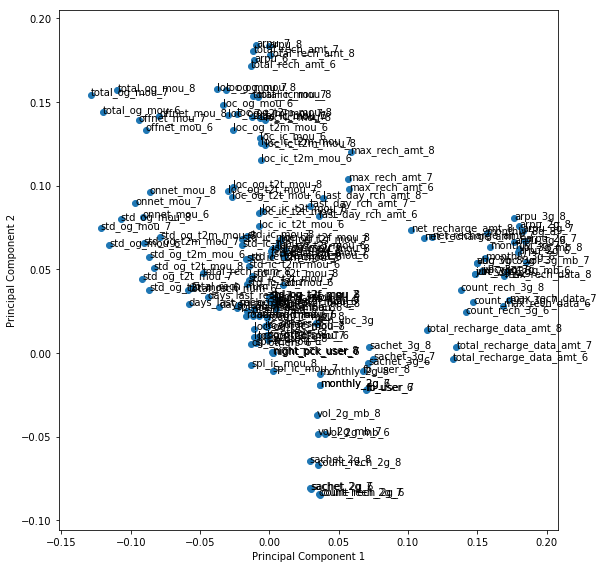

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [55]:
pca.explained_variance_ratio_

array([1.06238780e-01, 9.42912766e-02, 6.67430095e-02, 5.03066357e-02,
       3.87554096e-02, 3.43736446e-02, 2.78842210e-02, 2.52346601e-02,
       2.43674615e-02, 2.23852133e-02, 2.10788827e-02, 1.98236613e-02,
       1.85504523e-02, 1.82334003e-02, 1.73602444e-02, 1.72102832e-02,
       1.59536545e-02, 1.51469275e-02, 1.38949045e-02, 1.35019388e-02,
       1.31146298e-02, 1.28982031e-02, 1.26316582e-02, 1.16605999e-02,
       1.02998418e-02, 1.00928350e-02, 9.22743038e-03, 8.51352166e-03,
       8.30367206e-03, 7.76393589e-03, 7.56074978e-03, 7.14850175e-03,
       7.08122632e-03, 6.79074901e-03, 6.45176097e-03, 6.44839393e-03,
       6.28074960e-03, 6.19565958e-03, 5.96592009e-03, 5.81440903e-03,
       5.52291524e-03, 5.47085119e-03, 5.36543255e-03, 5.22567158e-03,
       4.97936202e-03, 4.89076288e-03, 4.81220082e-03, 4.72891687e-03,
       4.59988878e-03, 4.46809911e-03, 4.25859197e-03, 4.17830572e-03,
       4.12562094e-03, 3.92100562e-03, 3.89820089e-03, 3.66164828e-03,
      

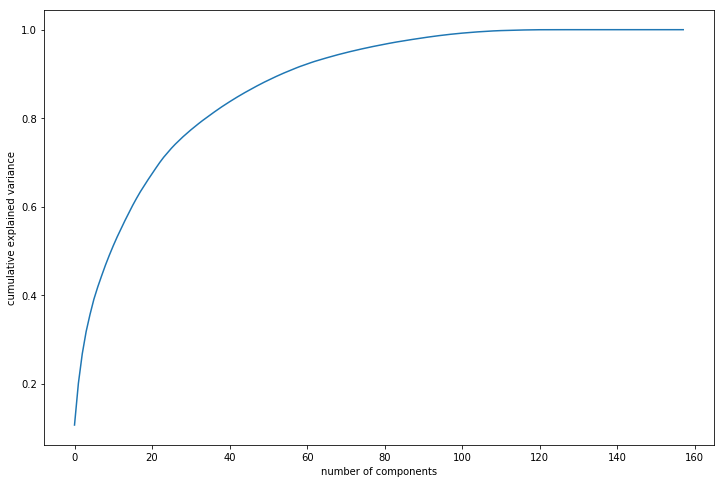

In [56]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [57]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=72)

In [58]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 72)

In [59]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

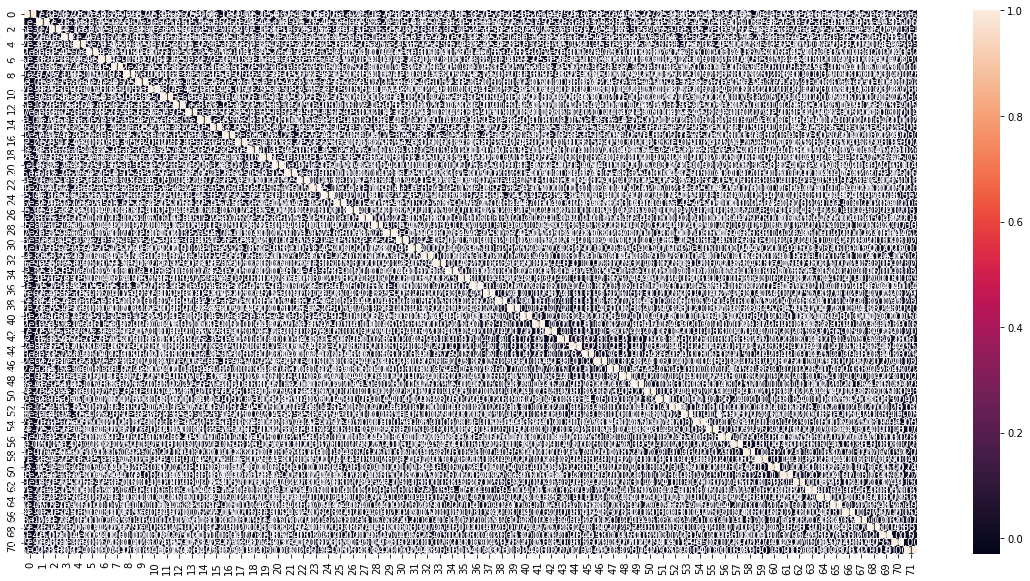

In [60]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [61]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.03180816572301748 , min corr:  -0.030130883637960775


In [62]:
#Applying selected components to the test data - 16 components
X_test[col]=scaler.fit_transform(X_test[col])
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 72)

In [63]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [64]:
y_train_pred=model_pca.predict_proba(df_train_pca)
print(y_train_pred[:,1])


[0.44759146 0.06996634 0.23186565 ... 0.62940731 0.39942691 0.23847732]


In [65]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred[:,1]})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.447591,39186
1,0,0.069966,39833
2,0,0.231866,38778
3,0,0.000045,43026
4,0,0.045474,12271


In [66]:
#ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
fpr

array([0.        , 0.        , 0.        , ..., 0.99989642, 0.99994821,
       1.        ])

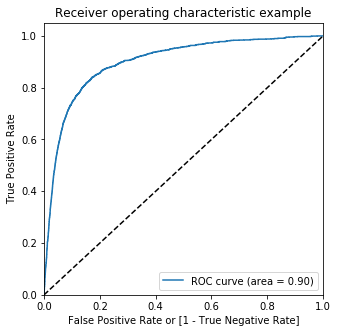

In [68]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [69]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.447591,39186,1,1,1,1,1,0,0,0,0,0
1,0,0.069966,39833,1,0,0,0,0,0,0,0,0,0
2,0,0.231866,38778,1,1,1,0,0,0,0,0,0,0
3,0,0.000045,43026,1,0,0,0,0,0,0,0,0,0
4,0,0.045474,12271,1,0,0,0,0,0,0,0,0,0


In [70]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.427762  0.975754  0.379771
0.2   0.2  0.569762  0.951508  0.536330
0.3   0.3  0.673714  0.923122  0.651872
0.4   0.4  0.752143  0.888823  0.740173
0.5   0.5  0.817095  0.849202  0.814283
0.6   0.6  0.864429  0.785334  0.871355
0.7   0.7  0.898857  0.709048  0.915480
0.8   0.8  0.920667  0.552336  0.952924
0.9   0.9  0.925095  0.266706  0.982754


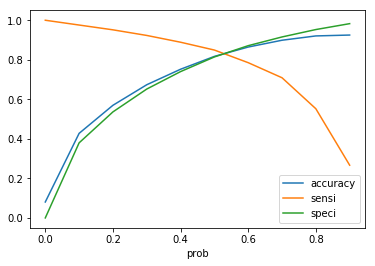

In [71]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [72]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.55 else 0)

In [73]:
y_train_pred_final.head(30)

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.447591,39186,1,1,1,1,1,0,0,0,0,0,0
1,0,0.069966,39833,1,0,0,0,0,0,0,0,0,0,0
2,0,0.231866,38778,1,1,1,0,0,0,0,0,0,0,0
3,0,0.000045,43026,1,0,0,0,0,0,0,0,0,0,0
4,0,0.045474,12271,1,0,0,0,0,0,0,0,0,0,0
5,0,0.023492,33607,1,0,0,0,0,0,0,0,0,0,0
6,0,0.093840,51913,1,0,0,0,0,0,0,0,0,0,0
7,0,0.032757,16668,1,0,0,0,0,0,0,0,0,0,0
8,0,0.141286,54924,1,1,0,0,0,0,0,0,0,0,0
9,0,0.358590,33733,1,1,1,1,0,0,0,0,0,0,0


In [74]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8420952380952381

In [75]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[16293,  3016],
       [  300,  1391]], dtype=int64)

In [76]:
#Making prediction on the test data

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.9'

In [77]:
y_test_pred_df = pd.DataFrame(pred_probs_test)

In [78]:
y_test_df = pd.DataFrame(y_test)

In [79]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [80]:
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [81]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

In [82]:
y_pred_final.head()

,churn,Prospect ID,0
0,1,20296,0.861625
1,1,8279,0.501603
2,0,72269,0.063876
3,0,65602,0.288598
4,1,42758,0.908690


In [83]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [84]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','churn','Churn_Prob'], axis=1)

In [85]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,churn,Churn_Prob
0,20296,1,0.861625
1,8279,1,0.501603
2,72269,0,0.063876
3,65602,0,0.288598
4,42758,1,0.908690


In [86]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)

In [87]:
y_pred_final.head()

,Prospect ID,churn,Churn_Prob,final_predicted
0,20296,1,0.861625,1
1,8279,1,0.501603,0
2,72269,0,0.063876,0
3,65602,0,0.288598,0
4,42758,1,0.908690,1


In [88]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8359071214309521

In [89]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6904, 1347],
       [ 130,  620]], dtype=int64)

In [90]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8266666666666667

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.8367470609623076

In [93]:
620/(620+130)

0.8266666666666667

In [94]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [95]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [96]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [97]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [98]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8251
          1       0.59      0.12      0.20       750

avg / total       0.90      0.92      0.89      9001



In [99]:
# Printing confusion matrix
confusion2=confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[8188   63]
 [ 659   91]]


In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [102]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.359380,0.030686,0.005995,0.005016,2,{'max_depth': 2},0.797191,0.793095,0.760238,0.776190,0.771850,0.779714,0.013698,4,0.800762,0.788988,0.769940,0.772619,0.776620,0.781786,0.011515
1,0.863780,0.013534,0.012840,0.002524,7,{'max_depth': 7},0.865984,0.865000,0.873095,0.870714,0.872112,0.869381,0.003279,3,0.885469,0.893869,0.896964,0.893393,0.896851,0.893309,0.004188
2,1.115864,0.034513,0.010727,0.005532,12,{'max_depth': 12},0.914068,0.906429,0.912619,0.917143,0.906883,0.911429,0.004164,2,0.960831,0.958393,0.957857,0.960595,0.958871,0.959310,0.001192
3,1.188917,0.031437,0.012503,0.006251,17,{'max_depth': 17},0.924304,0.917143,0.917857,0.920238,0.919981,0.919905,0.002502,1,0.979046,0.978690,0.977738,0.976012,0.979168,0.978131,0.001172


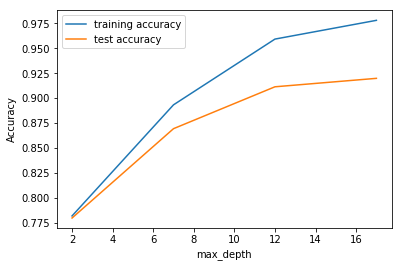

In [103]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100,800,200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=11,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

In [114]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.414556,0.365696,0.058239,0.005864,100,{'n_estimators': 100},0.886694,0.883333,0.880952,0.883571,0.879257,0.882762,0.002530,3,0.899875,0.905952,0.904107,0.905000,0.906196,0.904226,0.002298
1,15.266116,1.302129,0.125772,0.023819,200,{'n_estimators': 200},0.889788,0.880476,0.885238,0.881190,0.883067,0.883952,0.003353,2,0.902732,0.907202,0.905774,0.900595,0.907506,0.904762,0.002683
2,24.995235,1.875358,0.198556,0.022329,300,{'n_estimators': 300},0.890026,0.884286,0.884762,0.882619,0.882115,0.884762,0.002812,1,0.902792,0.906190,0.907619,0.905000,0.907327,0.905786,0.001760


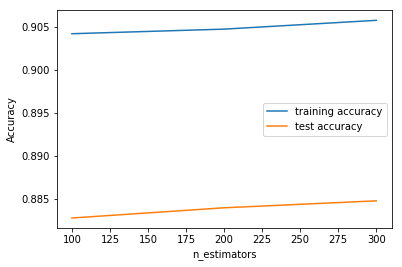

In [115]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=11,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [107]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.97      0.76      0.85      8251
          1       0.22      0.75      0.34       750

avg / total       0.91      0.76      0.81      9001



In [109]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6237 2014]
 [ 188  562]]
0.755360515498278


In [110]:
# creating a linear model

#model_linear = SVC(kernel='linear')
#model_linear.fit(df_train_pca, y_train)

# predict
#y_pred = model_linear.predict(df_test_pca)


In [111]:
DecisionTreeClassifier?

In [112]:
# confusion matrix and accuracy

# accuracy
#print('class wise report:',metrics.classification_report(y_true=y_test, y_pred=y_pred),"\n")
#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))